In [1]:
import mdtraj as md
import pyemma
from pyemma.coordinates import source
from pyemma.util.contexts import settings
import itertools
import numpy as np
import pandas as pd
import MDAnalysis as mda
import matplotlib as mpl
import matplotlib.pyplot as plt
import mdtraj as md
import pyemma
from pyemma.coordinates import source
from pyemma.util.contexts import settings

In [2]:
arr1 = [pyemma.coordinates.load(f'features_arf/ca_com_dists_v1_{i:03d}.npy') for i in range(3)]

In [4]:
arr3 = [pyemma.coordinates.load(f'features_arf/contacts_v1_{i:03d}.npy') for i in range(3)]

In [5]:
arr4 = [pyemma.coordinates.load(f'features_arf/dists_v1_{i:03d}.npy') for i in range(3)]

In [6]:
arr2 = [pyemma.coordinates.load(f'features_arf/ca_v1_{i:03d}.npy') for i in range(3)]

In [302]:
result = [np.concatenate([a1, a2, a3, a4, a5, a6], axis=1) for a1, a2, a3, a4, a5, a6 in zip(arr3, arr4, arr2, arr1, arr5, arr7)]


In [303]:
np.shape(result[0])

(10001, 954)

In [7]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import mdshare  # for trajectory data

from tqdm.notebook import tqdm  # progress bar

In [8]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    torch.backends.cudnn.benchmark = True
else:
    device = torch.device("cpu")
torch.set_num_threads(12)

print(f"Using device {device}")

Using device cuda


In [11]:
from deeptime.util.data import TrajectoryDataset, TrajectoriesDataset

dataset = TrajectoriesDataset.from_numpy(10, result)

In [12]:
np.shape(dataset)

(98284, 2, 630)

In [13]:
np.shape(result[0])

(10001, 630)

In [14]:
n_val = int(len(dataset)*.1)
train_data, val_data = torch.utils.data.random_split(dataset, [len(dataset) - n_val, n_val])

In [272]:
np.shape(dataset)

(98365, 2, 203)

In [271]:
np.shape(train_data)

(78692, 2, 203)

In [17]:
arr5[0].shape[1]

14

In [9]:
device = torch.device("cuda")
torch.backends.cudnn.benchmark = True
torch.set_num_threads(12)

In [284]:
train_data, val_data = torch.utils.data.random_split(dataset, [len(dataset) - n_val, n_val])

In [341]:
 np.shape(arr4[0])

(10001, 35)

In [345]:
from torch.utils.data import DataLoader
from deeptime.util.data import TrajectoryDataset

dataset = TrajectoriesDataset.from_numpy(10, arr4)

n_val = int(len(dataset)*.1)
train_data, val_data = torch.utils.data.random_split(dataset, [len(dataset) - n_val, n_val])

loader_train = DataLoader(train_data, batch_size=100, shuffle=True)
loader_val = DataLoader(val_data, batch_size=len(val_data), shuffle=False)

In [346]:
from deeptime.decomposition.deep import TVAEEncoder

encoder = TVAEEncoder([35, 10,  10,  2], nonlinearity=torch.nn.ReLU)
print(encoder)

TVAEEncoder(
  (_sequential): Sequential(
    (0): Linear(in_features=35, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
  )
  (_to_mu): Linear(in_features=10, out_features=2, bias=True)
  (_to_logvar): Linear(in_features=10, out_features=2, bias=True)
)


In [347]:
decoder = MLP([2, 10, 10, 35], nonlinearity=torch.nn.ReLU, initial_batchnorm=True)

In [348]:
from deeptime.decomposition.deep import TVAE

tvae = TVAE(encoder, decoder, optimizer='Adam', learning_rate=1e-2)
tvae.fit(loader_train, n_epochs=50, validation_loader=loader_val)
tvae_model = tvae.fetch_model()

In [349]:
tvae.validation_losses

array([[8.8500000e+02, 2.1223566e+07],
       [1.7700000e+03, 2.0012328e+07],
       [2.6550000e+03, 1.9657558e+07],
       [3.5400000e+03, 1.9572282e+07],
       [4.4250000e+03, 1.9728188e+07],
       [5.3100000e+03, 1.9512392e+07],
       [6.1950000e+03, 1.9626112e+07],
       [7.0800000e+03, 1.9425588e+07],
       [7.9650000e+03, 1.9253434e+07],
       [8.8500000e+03, 1.9474584e+07],
       [9.7350000e+03, 2.0500372e+07],
       [1.0620000e+04, 1.9158350e+07],
       [1.1505000e+04, 1.9227078e+07],
       [1.2390000e+04, 1.9256624e+07],
       [1.3275000e+04, 1.9471086e+07],
       [1.4160000e+04, 1.9476340e+07],
       [1.5045000e+04, 1.9258550e+07],
       [1.5930000e+04, 1.9234710e+07],
       [1.6815000e+04, 1.9240200e+07],
       [1.7700000e+04, 1.9108022e+07],
       [1.8585000e+04, 1.9414670e+07],
       [1.9470000e+04, 1.9574304e+07],
       [2.0355000e+04, 1.9172734e+07],
       [2.1240000e+04, 1.9333200e+07],
       [2.2125000e+04, 1.9034820e+07],
       [2.3010000e+04, 1.

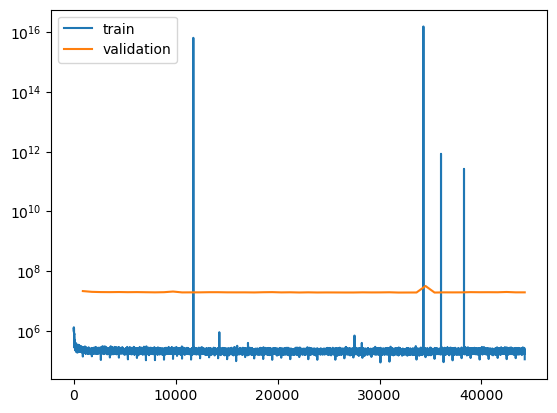

In [350]:
plt.semilogy(*tvae.train_losses.T, label='train')
plt.semilogy(*tvae.validation_losses.T, label='validation')
plt.legend();

In [207]:
from deeptime.util.torch import MLP

In [14]:
from torch.utils.data import DataLoader
from deeptime.util.data import TrajectoryDataset
from deeptime.util.data import TrajectoryDataset, TrajectoriesDataset
dataset = TrajectoriesDataset.from_numpy(3, arr3)
#

n_val = int(len(dataset)*.2)
train_data, val_data = torch.utils.data.random_split(dataset, [len(dataset) - n_val, n_val])

loader_train = DataLoader(train_data, batch_size=50, shuffle=True)
loader_val = DataLoader(val_data, batch_size=len(val_data), shuffle=False)

In [15]:
loader_train

In [48]:
from deeptime.util.torch import MLP

units = [27,10, 2]
encoder = MLP(units, nonlinearity=torch.nn.ReLU, output_nonlinearity=torch.nn.Sigmoid,
              initial_batchnorm=False)
decoder = MLP(units[::-1], nonlinearity=torch.nn.ReLU, initial_batchnorm=False)

In [49]:
from deeptime.decomposition.deep import TAE

tae = TAE(encoder, decoder, learning_rate=1e-3)
tae.fit(loader_train, n_epochs=30, validation_loader=loader_val)
tae_model = tae.fetch_model()

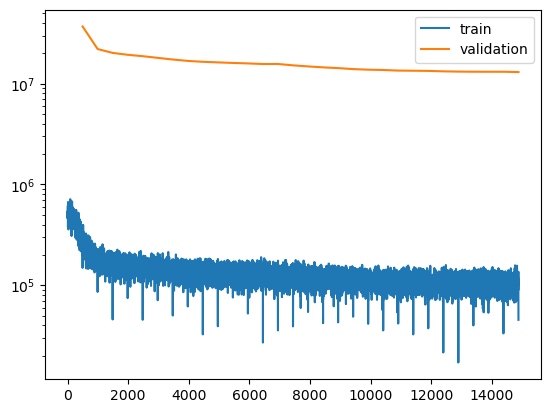

In [47]:
plt.semilogy(*tae.train_losses.T, label='train')
plt.semilogy(*tae.validation_losses.T, label='validation')
plt.legend();

In [12]:
from deeptime.decomposition.deep import TVAEEncoder

encoder = TVAEEncoder([203, 20, 20, 4], nonlinearity=torch.nn.ReLU)
print(encoder)

TVAEEncoder(
  (_sequential): Sequential(
    (0): Linear(in_features=203, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=20, bias=True)
    (3): ReLU()
  )
  (_to_mu): Linear(in_features=20, out_features=4, bias=True)
  (_to_logvar): Linear(in_features=20, out_features=4, bias=True)
)


In [13]:
decoder = MLP([4, 20, 20,203], nonlinearity=torch.nn.ReLU, initial_batchnorm=False)


NameError: name 'MLP' is not defined

In [101]:
np.shape(dataset)

(98284, 2, 203)

In [11]:
from deeptime.decomposition.deep import TVAE

tvae = TVAE(encoder, decoder, learning_rate=1e-2)
tvae.fit(loader_train, n_epochs=30, validation_loader=loader_val)
tvae_model = tvae.fetch_model()

NameError: name 'encoder' is not defined

In [377]:
np.shape(arr4[0])

(10001, 35)

In [378]:
arr4[0]

array([[19.,  0.,  0., ..., 13.,  0.,  0.],
       [41.,  0.,  0., ..., 18.,  0.,  0.],
       [24.,  6.,  0., ...,  8.,  0.,  0.],
       ...,
       [52., 18.,  0., ..., 55., 11.,  0.],
       [70., 37.,  1., ..., 56., 10.,  0.],
       [57., 21., 14., ..., 43.,  1.,  0.]], dtype=float32)

In [247]:
np.shape(result[0])

(10001, 630)

In [22]:
transformed_data = tae_model.transform(arr3)

In [24]:
np.shape(transformed_data[0])

(10278, 4)

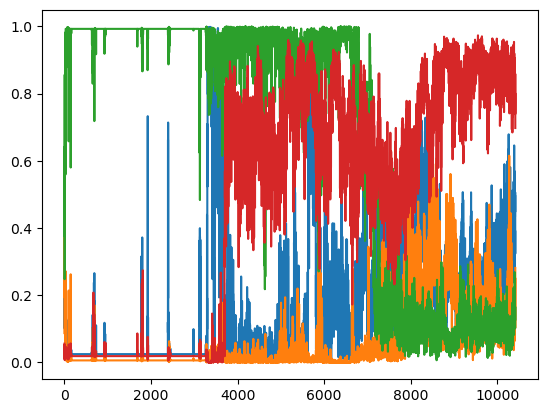

In [28]:
plt.plot(transformed_data[1])

In [29]:
import pyemma.coordinates as coords

# Number of cluster centers
n_clustercenters = 20

# Perform k-means clustering
clustering = coords.cluster_kmeans(transformed_data, k=n_clustercenters, max_iter=50)

# Discrete trajectories
dtrajs = clustering.dtrajs


initialize kmeans++ centers:   0%|                       | 0/20 [00:00<?, ?it/s]

kmeans iterations:   0%|                                 | 0/50 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|                 | 0/3 [00:00<?, ?it/s]

In [30]:
dat_cont = np.concatenate(transformed_data)

In [31]:
arr3_cont = np.concatenate(arr3)

In [32]:
cluster = pyemma.coordinates.cluster_kmeans(
    transformed_data, k=20, max_iter=200, stride=1, fixed_seed=1)
dtrajs_concatenated = np.concatenate(cluster.dtrajs)


initialize kmeans++ centers:   0%|                       | 0/20 [00:00<?, ?it/s]

kmeans iterations:   0%|                                | 0/200 [00:00<?, ?it/s]

getting output of KmeansClustering:   0%|                 | 0/3 [00:00<?, ?it/s]

In [33]:
dtrajs_concatenated = np.concatenate(dtrajs)

In [34]:
tica_dev = pyemma.coordinates.tica(arr3,lag=3, dim=2)
tica_out = tica_dev.get_output()
tica_concatenated = np.concatenate(tica_out)

calculate covariances:   0%|                              | 0/3 [00:00<?, ?it/s]

getting output of TICA:   0%|                             | 0/3 [00:00<?, ?it/s]

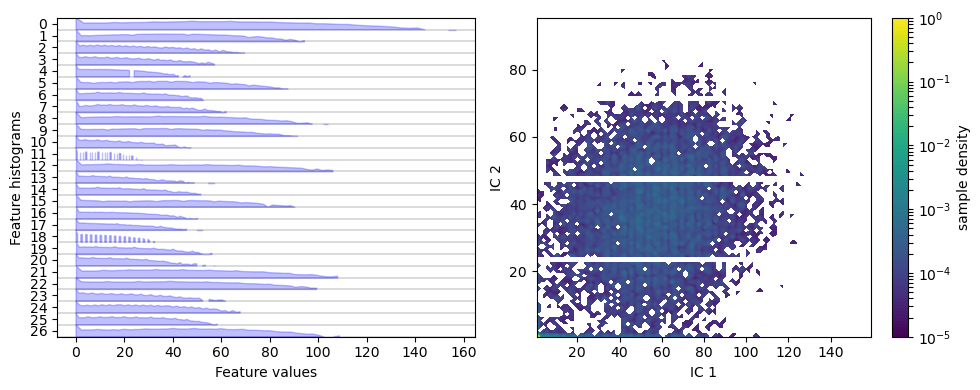

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
pyemma.plots.plot_feature_histograms(
    arr3_cont,
    ax=axes[0],
#     feature_labels=['IC1', 'IC2', 'IC3'],
    ylog=True, ignore_dim_warning=True)
pyemma.plots.plot_density(*arr3_cont[:, :2].T, ax=axes[1], logscale=True)
axes[1].set_xlabel('IC 1')
axes[1].set_ylabel('IC 2')
fig.tight_layout()
# plt.savefig('tica_update.png', dpi= 300)

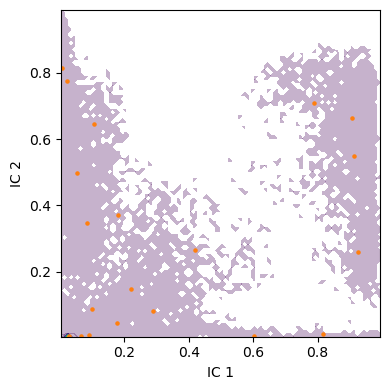

In [36]:
fig, ax = plt.subplots(figsize=(4, 4))
pyemma.plots.plot_density(
    *dat_cont[:, :2].T, ax=ax, cbar=False, alpha=0.3)
ax.scatter(*cluster.clustercenters[:, :2].T, s=5, c='C1')
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
fig.tight_layout()
# plt.savefig('cluster_update.png',dpi=300)

estimating BayesianMSM:   0%|                            | 0/13 [00:00<?, ?it/s]

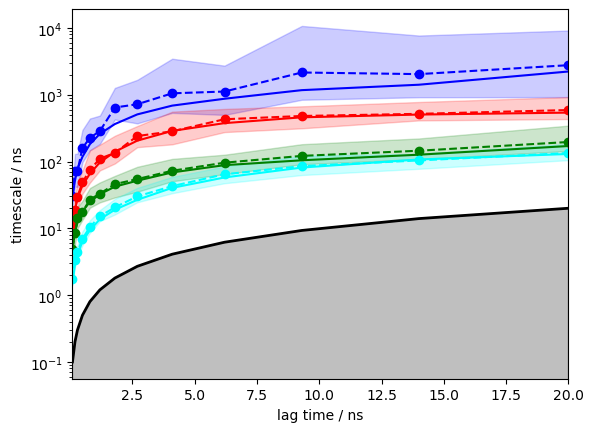

In [37]:
its = pyemma.msm.its(dtrajs, lags=200, nits=4, errors='bayes')
pyemma.plots.plot_implied_timescales(its, units='ns', dt=0.1);
# plt.savefig('its_update.png',dpi=300)

In [38]:
msm = pyemma.msm.bayesian_markov_model(dtrajs, lag=50, dt_traj='0.1 ns')
print('fraction of states used = {:.2f}'.format(msm.active_state_fraction))
print('fraction of counts used = {:.2f}'.format(msm.active_count_fraction))

pyemma.msm.estimators.bayesian_msm.BayesianMSM[24]: compute stat. inefficiencies

pyemma.msm.estimators.bayesian_msm.BayesianMSM[24]: Sampling MSMs:   0%| | 0/100

fraction of states used = 1.00
fraction of counts used = 1.00


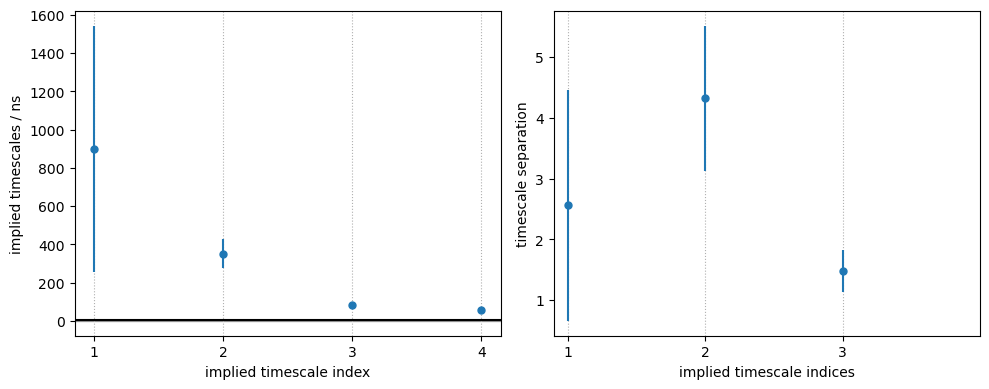

In [39]:
def its_separation_err(ts, ts_err):
    """
    Error propagation from ITS standard deviation to timescale separation.
    """
    return ts[:-1] / ts[1:] * np.sqrt(
        (ts_err[:-1] / ts[:-1])**2 + (ts_err[1:] / ts[1:])**2)


nits = 4

timescales_mean = msm.sample_mean('timescales', k=nits)
timescales_std = msm.sample_std('timescales', k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1),
    timescales_mean,
    yerr=timescales_std,
    fmt='.', markersize=10)
axes[1].errorbar(
    range(1, nits),
    timescales_mean[:-1] / timescales_mean[1:],
    yerr=its_separation_err(
        timescales_mean,
        timescales_std),
    fmt='.',
    markersize=10,
    color='C0')

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis='x', linestyle=':')

axes[0].axhline(msm.lag * 0.1, lw=1.5, color='k')
axes[0].axhspan(0, msm.lag * 0.1, alpha=0.3, color='k')
axes[0].set_xlabel('implied timescale index')
axes[0].set_ylabel('implied timescales / ns')
axes[1].set_xticks(range(1, nits))
# axes[1].set_xticklabels(
#     ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits + 2)],
#     rotation=45)
axes[1].set_xlabel('implied timescale indices')
axes[1].set_ylabel('timescale separation')
fig.tight_layout()
# plt.savefig('spectral_update.png',dpi=300)

estimating BayesianMSM:   0%|                             | 0/9 [00:00<?, ?it/s]

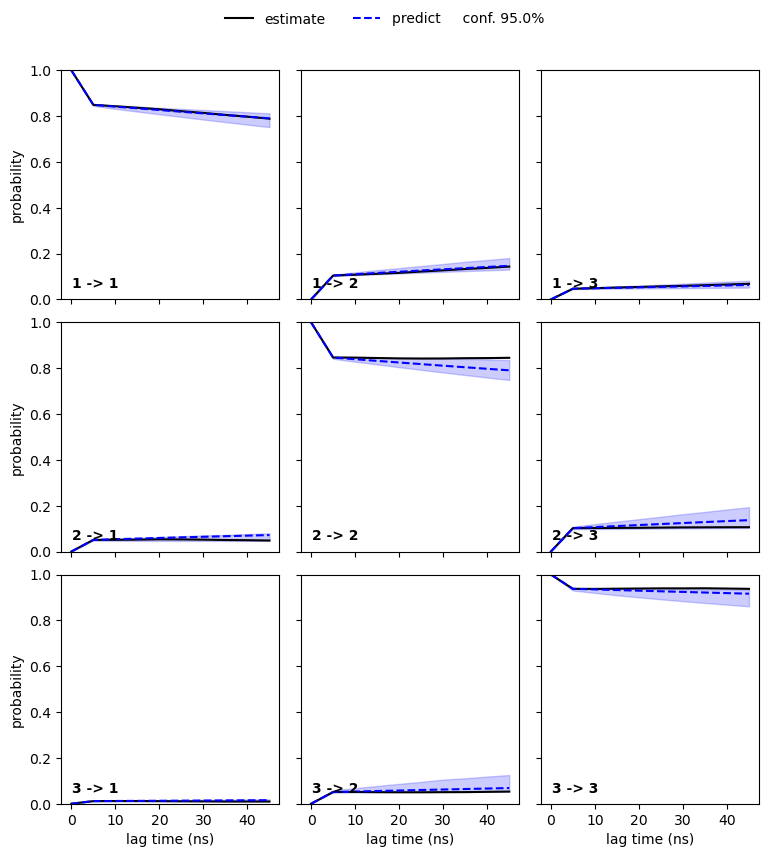

In [40]:
nstates = 3
cktest = msm.cktest(nstates)
pyemma.plots.plot_cktest(cktest, dt=0.1, units='ns');
# plt.savefig('cktets.png',dpi = 300)

In [188]:
tica_dev = pyemma.coordinates.tica(arr5,lag=1, dim=2)
tica_out = tica_dev.get_output()
tica_concatenated = np.concatenate(tica_out)

calculate covariances:   0%|                              | 0/9 [00:00<?, ?it/s]

getting output of TICA:   0%|                             | 0/9 [00:00<?, ?it/s]

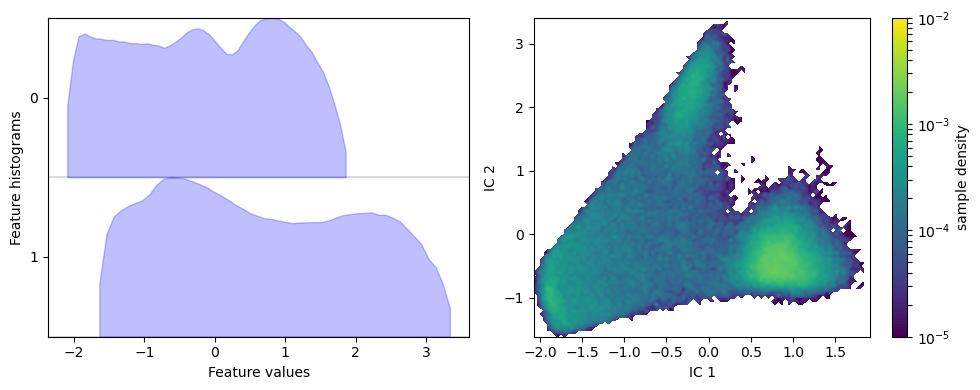

In [189]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
pyemma.plots.plot_feature_histograms(
    tica_concatenated,
    ax=axes[0],
#     feature_labels=['IC1', 'IC2', 'IC3'],
    ylog=True, ignore_dim_warning=True)
pyemma.plots.plot_density(*tica_concatenated[:, :2].T, ax=axes[1], logscale=True)
axes[1].set_xlabel('IC 1')
axes[1].set_ylabel('IC 2')
fig.tight_layout()
# plt.savefig('tica_update.png', dpi= 300)

In [376]:
arr2[0]

array([[-1.0832876 ,  1.867749  , -2.486367  , ..., -0.62254584,
        -1.3846753 ,  0.3934557 ],
       [-1.1151352 ,  2.0723047 , -2.4241595 , ...,  0.17987144,
        -1.9908015 ,  0.65220934],
       [-1.2473599 ,  1.5361307 , -1.7129097 , ...,  0.18399982,
        -1.3884317 ,  0.30170667],
       ...,
       [-1.1086105 , -0.8744306 , -1.0524144 , ..., -0.59388214,
        -1.289749  , -0.7636292 ],
       [-1.0871363 , -0.64087635, -1.0773257 , ..., -0.7188157 ,
        -1.4251387 , -0.41388336],
       [-1.2083483 , -0.5333455 , -1.0129873 , ..., -0.484611  ,
        -1.204239  , -0.7382711 ]], dtype=float32)

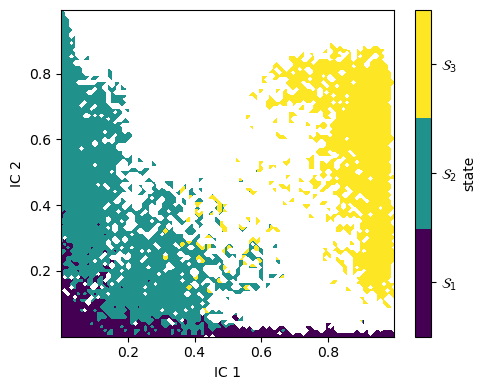

In [41]:
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]

fig, ax = plt.subplots(figsize=(5, 4))
_, _, misc = pyemma.plots.plot_state_map(
    *dat_cont[:, :2].T, metastable_traj, ax=ax)
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
misc['cbar'].set_ticklabels([r'$\mathcal{S}_%d$' % (i + 1)
                             for i in range(nstates)])
fig.tight_layout()
# fig.savefig('pcca_update.png',dpi=400)

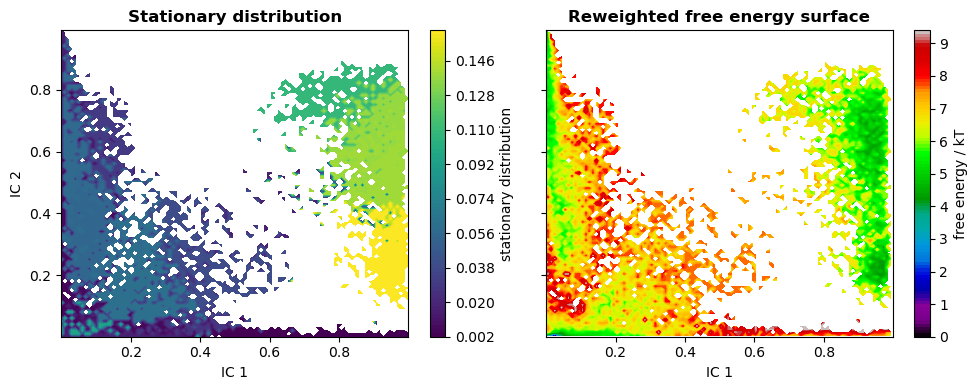

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
pyemma.plots.plot_contour(
    *dat_cont[:, :2].T,
    msm.pi[dtrajs_concatenated],
    ax=axes[0],
    mask=True,
    cbar_label='stationary distribution')
pyemma.plots.plot_free_energy(
    *dat_cont[:, :2].T,
    weights=np.concatenate(msm.trajectory_weights()),
    ax=axes[1],
    legacy=False)
for ax in axes.flat:
    ax.set_xlabel('IC 1')
axes[0].set_ylabel('IC 2')
axes[0].set_title('Stationary distribution', fontweight='bold')
axes[1].set_title('Reweighted free energy surface', fontweight='bold')
fig.tight_layout()
# plt.savefig('macro_energy_update.png',dpi=400)

In [43]:
mfpt = np.zeros((nstates, nstates))
for i in range(nstates):
    for j in range(nstates):
        mfpt[i, j] = msm.mfpt(
            msm.metastable_sets[i],
            msm.metastable_sets[j])

from pandas import DataFrame
print('MFPT / steps:')
DataFrame(np.round(mfpt, decimals=2), index=range(1, nstates + 1), columns=range(1, nstates + 1))

MFPT / steps:


,1,2,3
1,0.00,716.38,1386.44
2,2427.66,0.00,1071.30
3,3562.97,1441.47,0.00


In [384]:
tlist=['../trajdat/dat2/rep1_tot.xtc','../trajdat/dat2/rep2_tot.xtc','../trajdat/dat2/rep3_tot.xtc',\
       '../trajdat/dat2/rep4.xtc','../trajdat/dat2/rep6_tot2.xtc','../trajdat/dat/1_tot.xtc','../trajdat/dat/3_tot.xtc',\
        '../trajdat/dat/5_tot.xtc','../trajdat/dat/9_tot.xtc']

In [385]:
ae_samples = msm.sample_by_distributions(msm.metastable_distributions, 20)
torsions_source = pyemma.coordinates.source(tlist, top='../trajdat/dat/gro.gro')
pyemma.coordinates.save_trajs(
    torsions_source,
    ae_samples,
    outfiles=['./ae{}_.gro'.format(n + 1)
              for n in range(msm.n_metastable)])

Obtaining file info:   0%|                                | 0/9 [00:00<?, ?it/s]

['./ae1_.gro', './ae2_.gro', './ae3_.gro']

In [221]:
model

VAMPNetModel-22439125650064:[{'device': None,
                             'dtype': None,
                             'lobe': MLP(
                              (_sequential): Sequential(
                                (0): Linear(in_features=630, out_features=15, bias=True)
                                (1): ReLU()
                                (2): Linear(in_features=15, out_features=10, bias=True)
                                (3): ReLU()
                                (4): Linear(in_features=10, out_features=10, bias=True)
                                (5): ReLU()
                                (6): Linear(in_features=10, out_features=5, bias=True)
                                (7): ReLU()
                                (8): Linear(in_features=5, out_features=4, bias=True)
                              )
                            ),
                             'lobe_timelagged': MLP(
                              (_sequential): Sequential(
                        

In [63]:
import deeptime as dt
from deeptime.plots import plot_implied_timescales
from deeptime.util.validation import implied_timescales

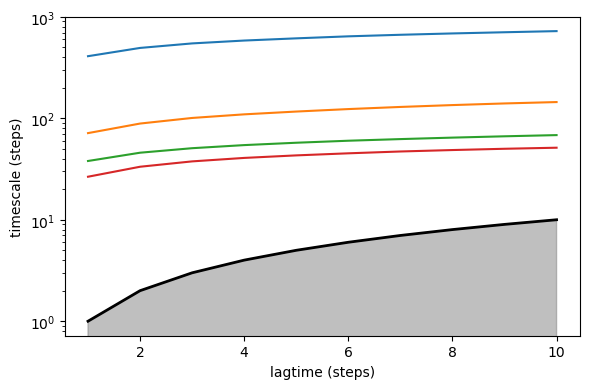

In [64]:
lagtimes = np.arange(1, 11)
its = implied_timescales([dt.decomposition.VAMP(lagtime=lag, observable_transform=tae_model).fit(arr7).fetch_model() for lag in lagtimes])
fig, axes = plt.subplots(1, 1, figsize=(6, 4))

plot_implied_timescales(its, ax=axes)
axes.set_yscale('log')
axes.set_xlabel('lagtime (steps)')
axes.set_ylabel('timescale (steps)')
fig.tight_layout()

In [65]:
trans_cont = np.concatenate(transformed_data)

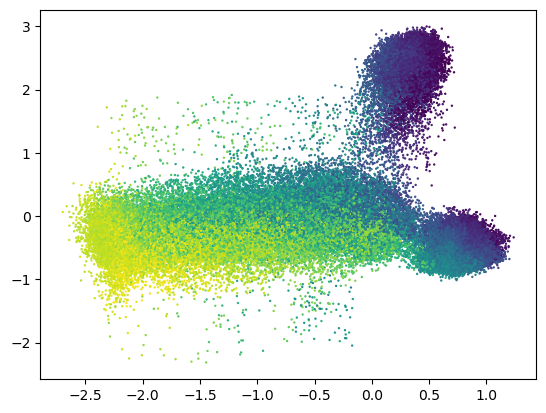

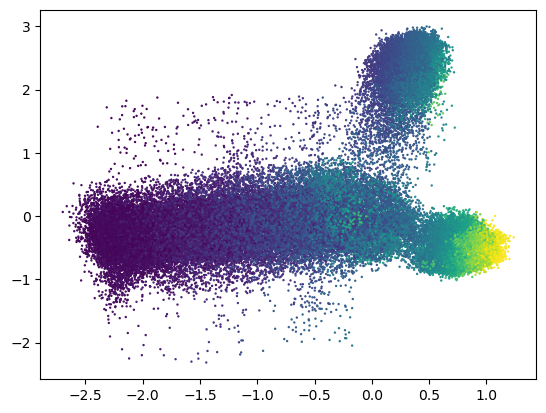

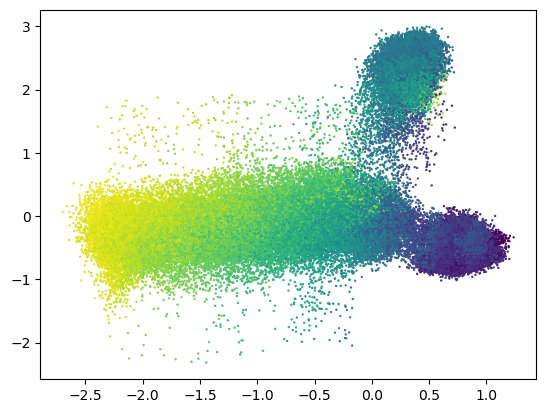

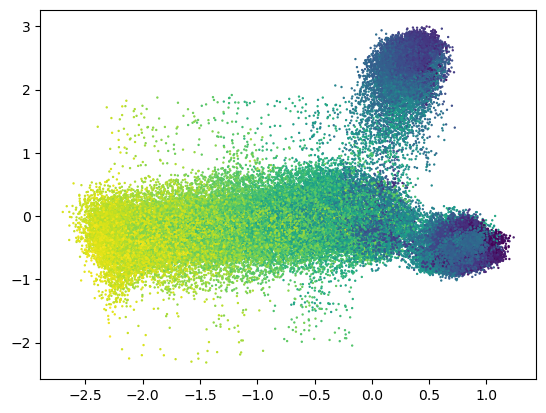

In [66]:
for i in range(4):
    plt.scatter(*tica_concatenated[:,:2].T, c=trans_cont[:,i], s=0.5)
    plt.show()

In [57]:
colorcode = np.argmax(trans_cont, axis=1)

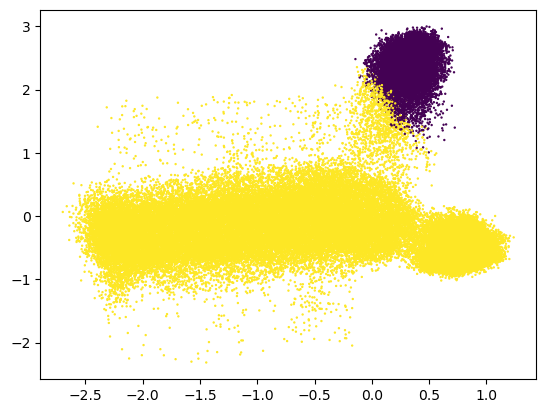

In [58]:
plt.scatter(*tica_concatenated.T, c=colorcode, s=0.5)
plt.show()

In [105]:
ptm=[dt.decomposition.VAMP(lagtime=10, observable_transform=model).fit(arr7).fetch_model() ]

In [127]:
from deeptime.markov.msm import BayesianMSM

In [ ]:
[dt.decomposition.VAMP(lagtime=lag, observable_transform=model).fit(arr7).fetch_model() for lag in lagtimes]

In [139]:
vamp_model_vnet = dt.decomposition.VAMP(lagtime=1, observable_transform=model).fit(arr7).fetch_model()

In [142]:
vamp_model_direct = dt.decomposition.VAMP(lagtime=1, dim=1).fit(arr7).fetch_model()

In [146]:
print(f'VAMPNet score {vamp_model_vnet.score(2):.5f}')
print(f'Direct VAMP score {vamp_model_direct.score(2):.5f}')

VAMPNet score 3.99698
Direct VAMP score 1.99455


In [150]:
arr7_conc = np.concatenate(arr7)

In [166]:
msm_estimator = dt.markov.msm.MaximumLikelihoodMSM(lagtime=10)
msm = msm_estimator.fit(dtraj_rec).fetch_model()

In [171]:
from deeptime.clustering import KMeans
from deeptime.markov.msm import MaximumLikelihoodMSM

projection = vamp_model_vnet.transform(arr7_conc)
dtraj_rec = KMeans(4).fit(projection).transform(projection)
msm = MaximumLikelihoodMSM().fit(dtraj_rec, lagtime=1).fetch_model()

In [172]:
print("estimated transition matrix", msm.transition_matrix)

estimated transition matrix [[9.97969134e-01 5.93806073e-04 1.11021060e-03 3.26849257e-04]
 [7.12065885e-04 9.99121344e-01 0.00000000e+00 1.66589744e-04]
 [3.05377050e-03 0.00000000e+00 9.96946229e-01 0.00000000e+00]
 [6.47425216e-04 2.75178707e-04 0.00000000e+00 9.99077396e-01]]


In [165]:
msm

MarkovStateModelCollection-22607701545744:[{'count_models': None,
                                           'reversible': True,
                                           'stationary_distributions': None,
                                           'transition_matrices': None,
                                           'transition_matrix_tolerance': 1e-06}]

In [169]:
 from deeptime.markov import TransitionCountEstimator
 from deeptime.markov.msm import BayesianMSM
 from deeptime.plots.chapman_kolmogorov import plot_ck_test

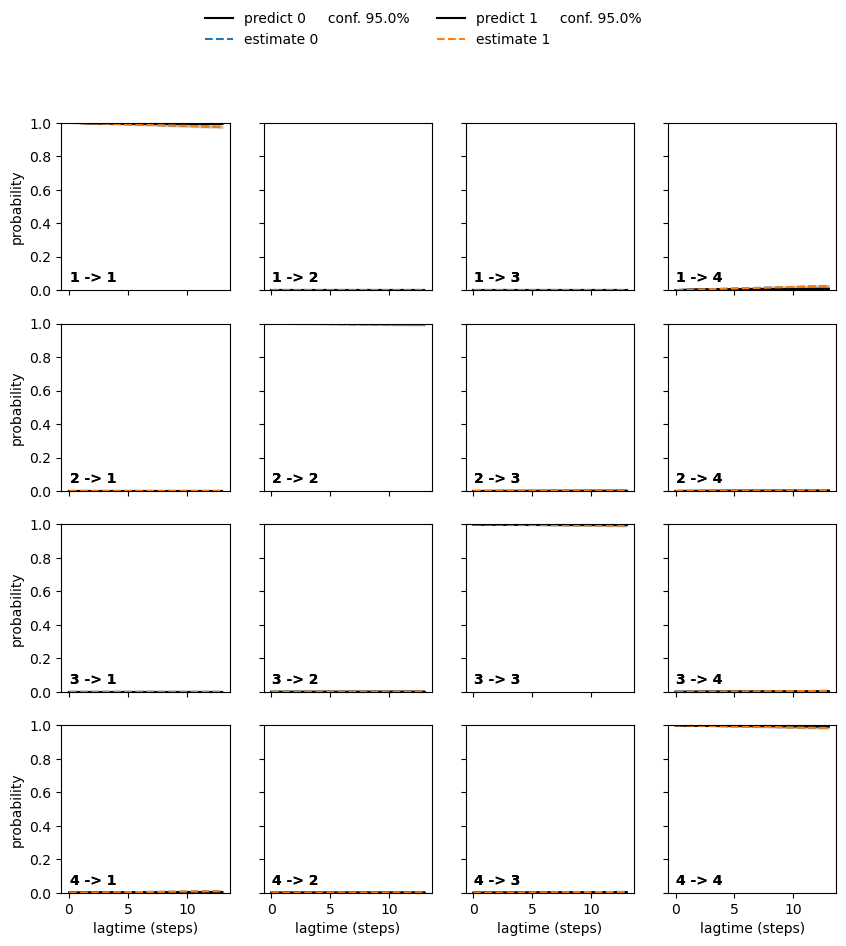

In [174]:
 models = []
 models2 = []
 for lag in [2, 3, 5, 13]:
     counts_estimator = TransitionCountEstimator(lagtime=lag, count_mode='effective')
     models.append(BayesianMSM().fit_fetch(counts_estimator.fit_fetch(dtraj_rec).submodel_largest()))
     models2.append(BayesianMSM().fit_fetch(counts_estimator.fit_fetch(dtraj_rec).submodel_largest()))

 test_model = models[0]
 ck_test = test_model.ck_test(models, n_metastable_sets=4)
 grid = plot_ck_test(ck_test, legend=False)

 test_model2 = models2[0]
 ck_test = test_model2.ck_test(models2, n_metastable_sets=4)
 plot_ck_test(ck_test, legend=True, grid=grid)